# 河道角度敏感性分析


In [1]:
#导入包
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy
import math

In [2]:
#前置参数确定 白格案例
#a is the sliding surface dip-angle.
a=math.atan(0.6488)*180/math.pi#32.9
# χ as a function of the sliding surface dip-angle
x=0.57+0.51*(1+np.exp((a-34)/10.5))**(-1)
#theta decline of the vallage
theta=0.05973#math.atan(10/2000)*180/math.pi#0.05973
theta=np.linspace(0,1,15)
#λ is expressed as a function of the valley bed inclination
lamda=0.37+1.1*np.tan(theta*math.pi/180.0)



In [3]:

#h0 is the evelation of the river bed
h0=2860#2921.986 

#h1 is the evelation of the lake leve
h1=2944#2909 开始   2931
h=h1-h0
#l is the length of the dam can be obeserive
l=567#567.992

bg=[]
#fai φ is the angle of repose of the landslide mass   average 35.5  range from 28.8 degrees to 44.7 degrees
for fai in np.linspace(30,40,6):
    #real repose angle
    beta_dc=fai*x
    beta_d=beta_dc-theta
    #Lb on herizon
    Lbh=(l-(l*np.tan(beta_dc*math.pi/180.0)-h)/(2*np.tan(beta_dc*math.pi/180.0)))*2
    Lb=Lbh*np.sin(beta_dc*math.pi/180.0)/(np.sin((180-beta_dc-theta)*math.pi/180.0))
    #梯形高度
    H=lamda*np.tan(beta_d*math.pi/180.0)*Lb
    hc=np.sin(theta*math.pi/180.0)*(Lb-H*np.tan(theta*math.pi/180.0)-H*np.tan((90-theta-beta_dc)*math.pi/180.0))
    #hc2=(Lb-H*(math.sin((theta+90-beta_dc-theta)*math.pi/180.0)/math.sin((beta_dc+theta)*math.pi/180.0)))*math.sin(theta*math.pi/180.0)
    hv=hc+H/np.cos(theta*math.pi/180.0)
    bg.append((hv-hc)*0.63+5.59)

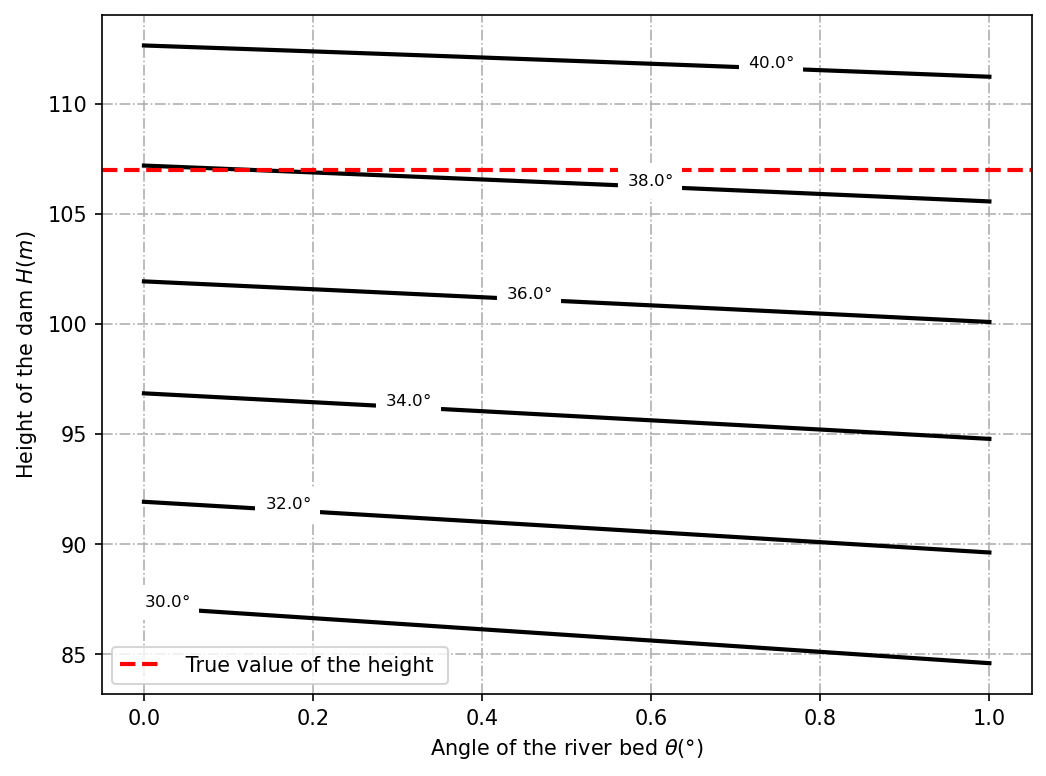

In [4]:
#paint
plt.figure(figsize=(8,6),dpi=150)

plt.grid(ls='-.') 
i=0
for fai in np.linspace(30,40,6):
    plt.plot(theta,bg[i],color="black",linewidth=2)
    plt.text(x=theta[2*i],y=bg[i][2*i],s=r'$%s°$'%fai,fontdict = {
    'family': 'Times New Roman', # 标注文本字体
    'fontsize': 8, # 文本大小
    'fontweight': 'bold', # 字体粗细
    'fontstyle': 'italic', # 字体风格
    'color': 'black',  # 文本颜色
    'backgroundcolor': 'white'}) # 椭圆外框)
    i=i+1

#plt.axvline(0.05973,color='red',ls="-")
plt.axhline(2967-h0,color='red',ls="--",lw=2,label=" True value of the height ")
plt.xlabel("Angle of the river bed "+r"$\theta (°)$")     # X轴标签
plt.ylabel("Height of the dam "+r"$H (m)$")         # Y轴坐标标签
#plt.title("Example")      #  曲线图的标题
plt.legend(loc=3)
plt.show()